In [61]:
# Dense Layer 모델 - Fahion MNIST : 실습
import numpy as np
import pandas as pd
# Keras fashion MNIST dataset을 다운로드
from tensorflow.keras.datasets import fashion_mnist, mnist
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11493376/11490434 [==============================] - 3s 0us/step


In [62]:
# 데이터 형태 파악
print("train dataset shape", train_images.shape, train_labels.shape)
print("test dataset shape", test_images.shape, test_labels.shape)

train dataset shape (60000, 28, 28) (60000,)
test dataset shape (10000, 28, 28) (10000,)


Text(0.5, 1.0, '5')

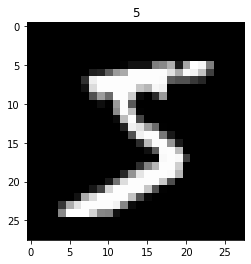

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray') # 이미지 시각화.
plt.title(train_labels[0])

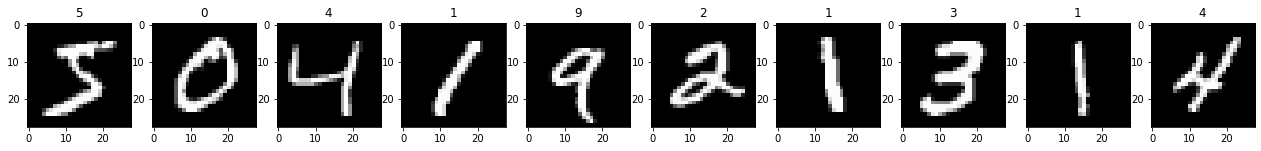

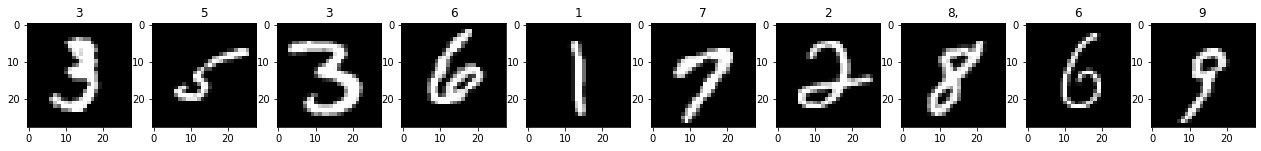

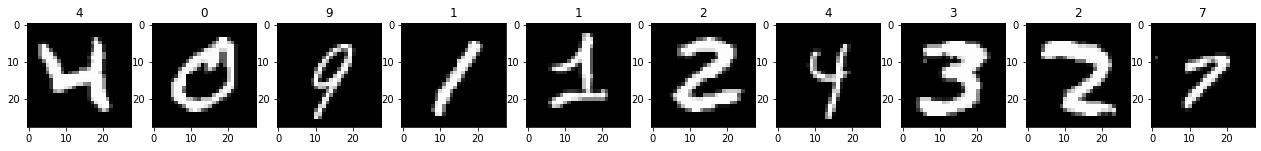

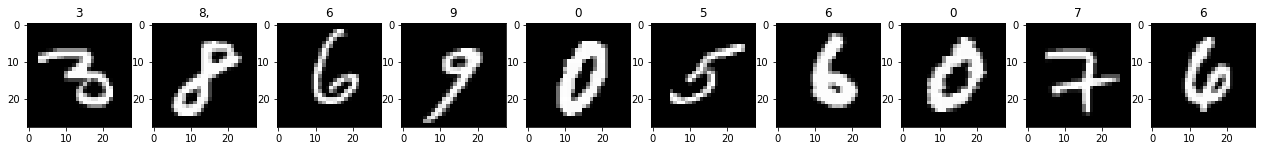

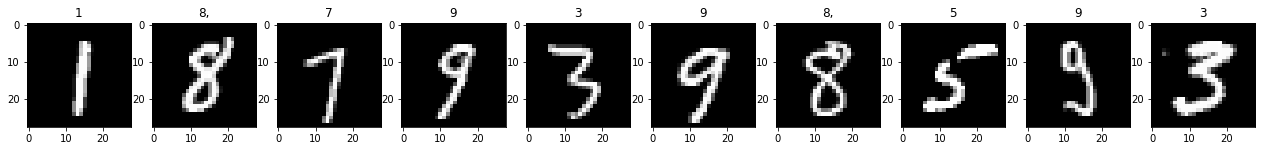

In [66]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
class_names = ['0','1','2','3','4','5','6','7','8,','9']
def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
step = 10
for i in range(0, step*5, step):
    show_images(train_images[i:i+step], train_labels[i:i+step], ncols=step)

In [67]:
# 데이터 전처리 수행.
# MinMax
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [68]:
INPUT_SIZE = 28
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),# 1차원으로 바꿔주는 역할
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')# 다중분류
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [69]:
# 모델의 Loss와 Optimazer 설정하고 학습 수행
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# sparse_categorical_crossentropy 
# 카테고리컬 크로스엔트로피 쓸라면 원핫 인코딩을 해야하지만 위에꺼 쓰면 안해도댐
# 하지만 우린 카테고리컬 크로스엔트로피 쓸꺼라 원핫 인코딩 할꺼.
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [71]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2754 - accuracy: 0.9226
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1193 - accuracy: 0.9645
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841 - accuracy: 0.9745
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9794
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0517 - accuracy: 0.9838
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0428 - accuracy: 0.9864
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9882
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0302 - accuracy: 0.9899
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.023

In [72]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.2753550112247467, 0.11931430548429489, 0.08414752781391144, 0.06475050747394562, 0.051663562655448914, 0.04284420609474182, 0.03601541742682457, 0.030225297436118126, 0.02565661445260048, 0.023464998230338097, 0.019881967455148697, 0.018058909103274345, 0.014983306638896465, 0.016078947111964226, 0.014307678677141666, 0.012777954339981079, 0.014604493975639343, 0.010251703672111034, 0.009717583656311035, 0.012020059861242771]
[0.9225999712944031, 0.9645166397094727, 0.9745333194732666, 0.979366660118103, 0.9837999939918518, 0.9863666892051697, 0.9881500005722046, 0.9899166822433472, 0.9914166927337646, 0.9921500086784363, 0.9933000206947327, 0.9938333630561829, 0.9950166940689087, 0.9945666790008545, 0.9953166842460632, 0.9955999851226807, 0.9953333139419556, 0.9965333342552185, 0.996666669845581, 0.9959999918937683]


In [73]:
pred_proba = model.predict(test_images)
print(pred_proba)


[[1.25175027e-11 2.24534665e-13 2.61703230e-13 ... 1.00000000e+00
  5.28443087e-14 4.95065056e-09]
 [2.48630953e-14 4.62843536e-15 1.00000000e+00 ... 2.22536052e-23
  1.34704725e-14 2.45876900e-25]
 [3.56504409e-12 9.99995708e-01 2.65058617e-07 ... 5.64255167e-08
  4.01148463e-06 1.35789609e-11]
 ...
 [2.01397093e-21 7.77764605e-16 1.12608928e-24 ... 1.49599063e-14
  1.17798956e-18 1.17269963e-13]
 [4.49002255e-15 1.22405587e-18 1.58456938e-21 ... 1.59152864e-15
  1.25042171e-10 1.99600388e-22]
 [3.00461678e-17 3.64732932e-22 4.84783690e-16 ... 5.26828727e-22
  6.23258357e-17 6.51808831e-21]]


In [74]:
pred_proba[0]

array([1.2517503e-11, 2.2453466e-13, 2.6170323e-13, 9.2985424e-09,
       1.5450512e-18, 5.5064926e-13, 1.3485129e-25, 1.0000000e+00,
       5.2844309e-14, 4.9506506e-09], dtype=float32)

In [75]:
test_labels[0]

7.0